In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('BodyFat.xls')
df.head(10)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,7,19.0,1.0549,26,181.00,69.75,26.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,8,12.8,1.0704,25,176.00,72.50,23.6,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,9,5.1,1.0900,25,191.00,74.00,24.6,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,10,12.0,1.0722,23,198.25,73.50,25.8,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [3]:
df.corr()['ADIPOSITY']

IDNO         0.047717
BODYFAT      0.727994
DENSITY     -0.714732
AGE          0.118851
WEIGHT       0.887352
HEIGHT      -0.024891
ADIPOSITY    1.000000
NECK         0.777857
CHEST        0.911799
ABDOMEN      0.923880
HIP          0.883269
THIGH        0.812706
KNEE         0.713660
ANKLE        0.500317
BICEPS       0.746384
FOREARM      0.558594
WRIST        0.625907
Name: ADIPOSITY, dtype: float64

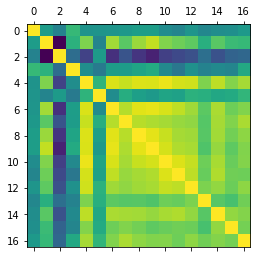

In [4]:
plt.matshow(df.corr())

In [5]:
def plot_corr_with_labels(df):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(20,30))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

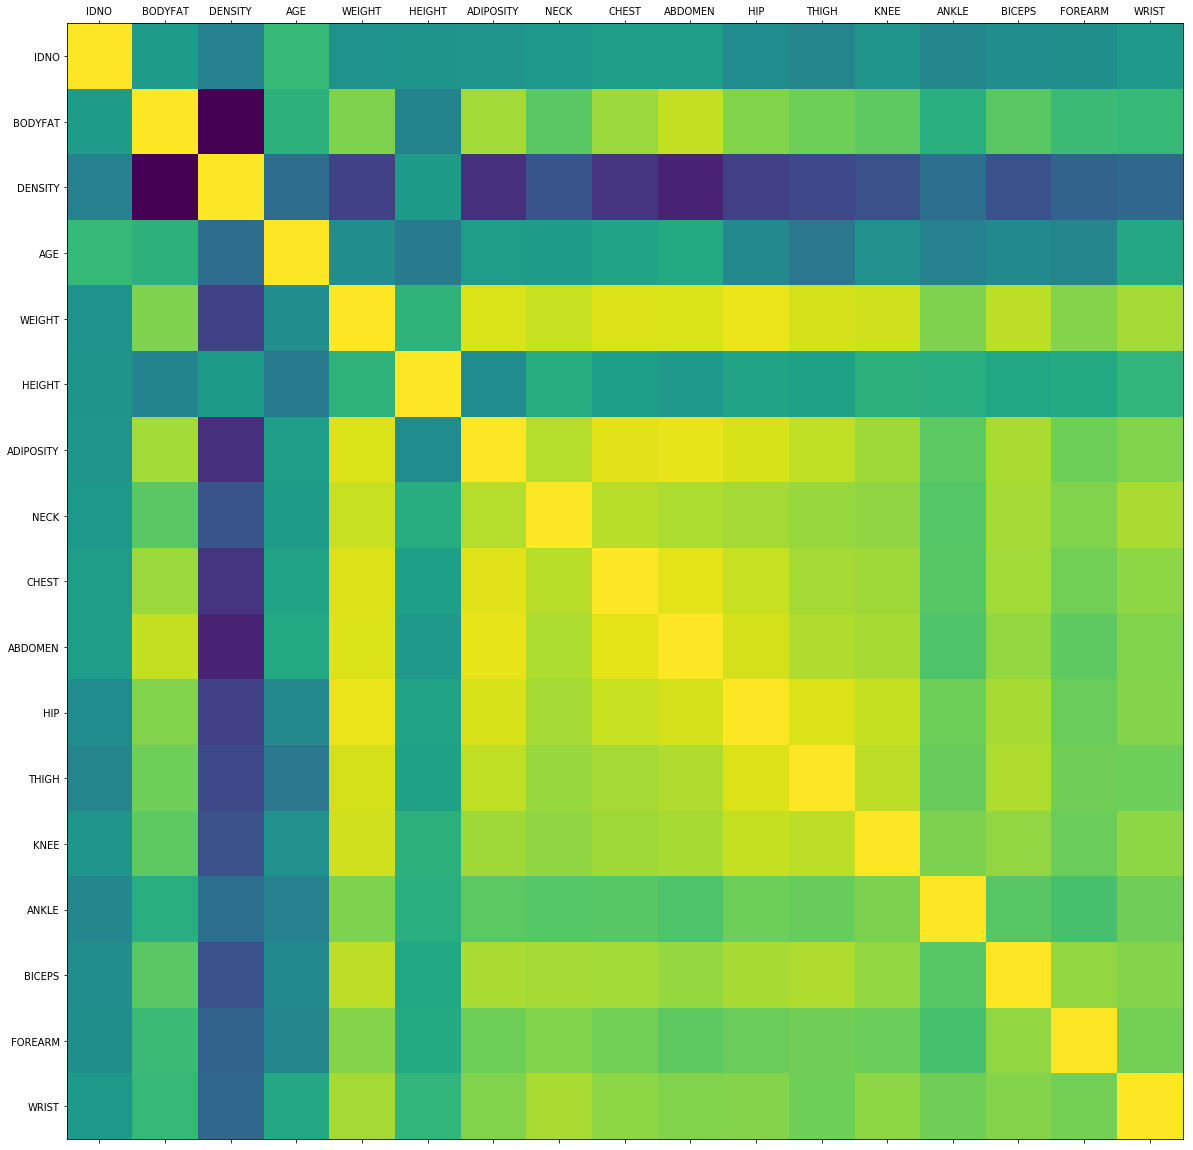

In [6]:
plot_corr_with_labels(df)

In [7]:
under_45 = df[df['AGE']<45]
over_45 = df[df['AGE']>=45]

print(under_45.size)
print(over_45.size)

2312
1972


**1. Find the body characteristic that's most strongly correlated with Adiposity (how fat one is). That could be asked this way: what's the best thing to measure if I want to predict how fat you are? Should I measure your ankle, your neck, your abdomen, etc?**
  - ABDOMEN:  since it relation is 0.923880, which is very close to 1, and it a positive relation, meaning if ABDOMEN increase then Adiposity should also increase.

In [11]:
u45 = under_45.corr()['ADIPOSITY']
o45 = over_45.corr()['ADIPOSITY']
changes = []
for i in range(df.columns.values.size):
    changes.append(u45[i] - o45[i])
    print(u45[i] - o45[i])

0.05891215582800935
-0.04490096372751273
0.02861417819300538
0.024507558141896868
0.0049510416404691115
0.03514388196089998
0.0
-0.030663409124133456
0.004175860726502445
-0.020820580840045233
-0.010269505864226813
0.03210502074934207
0.10830842534469676
-0.06194043011693734
0.08871955387814023
-0.014162800579309187
0.036528410574490966


In [25]:
list(df.columns.values)


['IDNO',
 'BODYFAT',
 'DENSITY',
 'AGE',
 'WEIGHT',
 'HEIGHT',
 'ADIPOSITY',
 'NECK',
 'CHEST',
 'ABDOMEN',
 'HIP',
 'THIGH',
 'KNEE',
 'ANKLE',
 'BICEPS',
 'FOREARM',
 'WRIST']


**2. What's the biggest change in this correlation between characteristics and adiposity as bodies age past 45? That could be asked this way: what characteristic changes the most as you age?**

In [24]:
body_changes = pd.DataFrame( data={'body_parts':body_part, 'changes':changes})
body_changes

,body_parts,changes
0,IDNO,0.058912
1,BODYFAT,-0.044901
2,DENSITY,0.028614
3,AGE,0.024508
4,WEIGHT,0.004951
5,HEIGHT,0.035144
6,ADIPOSITY,0.000000
7,NECK,-0.030663
8,CHEST,0.004176
9,ABDOMEN,-0.020821


 - knees are the biggest changes